In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Danh sách cạnh: (đỉnh 1, đỉnh 2, trọng số)
edges = [
    ('A', 'B', 6),
    ('B', 'C', 2),
    ('A', 'D', 8),
    ('A', 'H', 10),
    ('C', 'D', 7),
    ('D', 'I', 23),
    ('D', 'E', 18),
    ('D', 'H', 30),
    ('E', 'F', 15),
    ('E', 'I', 3),
    ('I', 'F', 14),
    ('G', 'F', 24),
    ('G', 'I', 13),
    ('G', 'H', 11),
    ('H', 'I', 11),
]

# Tìm danh sách tất cả các đỉnh
nodes = set()
for u, v, _ in edges:
    nodes.add(u)
    nodes.add(v)
nodes = list(nodes)




In [2]:
# Kruskal không dùng chỉ số nên cần ánh xạ đỉnh theo tên
class DisjointSet:
    def __init__(self, elements):
        self.parent = {e: e for e in elements}
        self.rank = {e: 0 for e in elements}

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        u_root = self.find(u)
        v_root = self.find(v)
        if u_root == v_root:
            return False
        if self.rank[u_root] < self.rank[v_root]:
            self.parent[u_root] = v_root
        else:
            self.parent[v_root] = u_root
            if self.rank[u_root] == self.rank[v_root]:
                self.rank[u_root] += 1
        return True

# Thuật toán Kruskal
def kruskal(edges, nodes):
    dsu = DisjointSet(nodes)
    edges_sorted = sorted(edges, key=lambda x: x[2])
    mst = []

    for u, v, weight in edges_sorted:
        if dsu.union(u, v):
            mst.append((u, v, weight))

    return mst

# Tìm cây khung nhỏ nhất
mst_edges = kruskal(edges, nodes)

# In kết quả ra terminal
print("Cây khung nhỏ nhất gồm các cạnh:")
for u, v, w in mst_edges:
    print(f"{u} - {v} với trọng số {w}")

# Tính tổng độ dài cây khung nhỏ nhất
total_weight = sum(w for _, _, w in mst_edges)
print(f"Tổng độ dài của cây khung nhỏ nhất: {total_weight}")


Cây khung nhỏ nhất gồm các cạnh:
B - C với trọng số 2
E - I với trọng số 3
A - B với trọng số 6
C - D với trọng số 7
A - H với trọng số 10
G - H với trọng số 11
H - I với trọng số 11
I - F với trọng số 14
Tổng độ dài của cây khung nhỏ nhất: 64


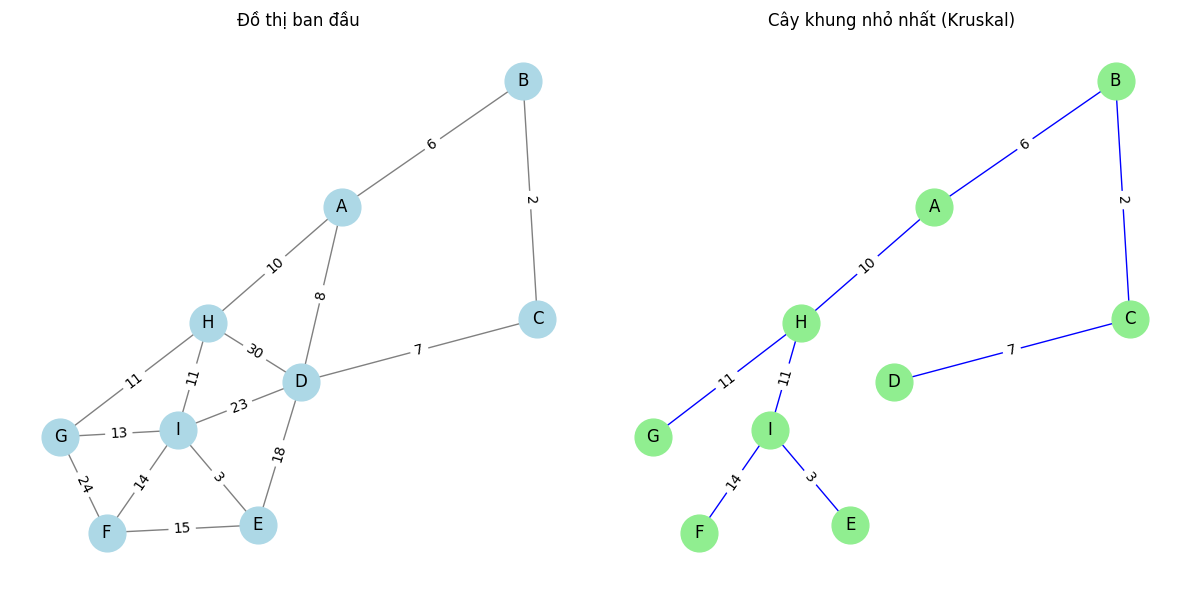

In [3]:
# Tạo đồ thị ban đầu và cây khung nhỏ nhất
G_original = nx.Graph()
G_original.add_weighted_edges_from(edges)

G_mst = nx.Graph()
G_mst.add_weighted_edges_from(mst_edges)

# Vị trí đỉnh nhất quán
pos = nx.spring_layout(G_original, seed=42)

# Vẽ 2 đồ thị
plt.figure(figsize=(12, 6))

# Đồ thị ban đầu
plt.subplot(1, 2, 1)
nx.draw(G_original, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700, font_size=12)
labels = nx.get_edge_attributes(G_original, 'weight')
nx.draw_networkx_edge_labels(G_original, pos, edge_labels=labels)
plt.title("Đồ thị ban đầu")

# Cây khung nhỏ nhất
plt.subplot(1, 2, 2)
nx.draw(G_mst, pos, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=700, font_size=12)
labels_mst = nx.get_edge_attributes(G_mst, 'weight')
nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=labels_mst)
plt.title("Cây khung nhỏ nhất (Kruskal)")

plt.tight_layout()
plt.show()